### 📖Content

* [Condtional selections](#chapter1)
    * [Multi-conditional selections](#section_1_1)
* [Get information aboout a DataFrame](#chapter2)
* [Groupby](#chapter3)
* [Apply functions to DataFrames](#chapter4)
* [Sort Data](#chapter5)
* [Import / Export data](#chapter6)
* [Exercise](#Chapter7)
* [Solution](#Chapter8)

In [216]:
import pandas as pd
import numpy as np

In [217]:
#Create a DataFrame
random_arr = np.random.randn(5,4)
index = ["A", "B", "C", "D", "E"]
columns = ["W", "X","Y", "Z"]
df = pd.DataFrame(data = random_arr, index = index, columns = columns)
df

,W,X,Y,Z
A,-1.421026,0.914904,-1.196348,-0.658324
B,-0.142865,0.535455,-1.337502,-0.249793
C,0.356914,1.428533,-0.950927,-1.924251
D,0.128768,-0.088755,-1.031069,2.604485
E,-0.907819,-2.150992,0.025807,1.523691


***
***

### 📖Condtional selections <a class="anchor" id="chapter1"></a>
Just like in NumPy, we can use the standard operants to check whether a condition is True or False

In [218]:
# >, >=, <, <=, !=, ==
df > 0

,W,X,Y,Z
A,False,True,False,False
B,False,True,False,False
C,True,True,False,False
D,True,False,False,True
E,False,False,True,True


We can then use it as a filter for the DataFrame

In [219]:
df[df>0]

,W,X,Y,Z
A,NaN,0.914904,NaN,NaN
B,NaN,0.535455,NaN,NaN
C,0.356914,1.428533,NaN,NaN
D,0.128768,NaN,NaN,2.604485
E,NaN,NaN,0.025807,1.523691


Filter the whole DataFrame for a condition in one column

In [220]:
#Only keep values, if the item in column W is > 0
df[df['W']>0]

,W,X,Y,Z
C,0.356914,1.428533,-0.950927,-1.924251
D,0.128768,-0.088755,-1.031069,2.604485


In [221]:
#count how many times a condition is True
sum(df['W']>0)

2

### 📖Multi-conditional selections <a class="anchor" id="section_1_1"></a>
We can combine several conditions. For DataFrames we have to use '&' for the logical combination 'and' and '|' for the logical operator 'or'

In [223]:
condition1 = df['X'] < 0
condition2 = df['Z'] > 0
df[ (condition1) | (condition2) ]

,W,X,Y,Z
D,0.128768,-0.088755,-1.031069,2.604485
E,-0.907819,-2.150992,0.025807,1.523691


***
***
### 📖Get information aboout a DataFrame <a class="anchor" id="chapter2"></a>

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, A to E
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       5 non-null      float64
 1   X       5 non-null      float64
 2   Y       5 non-null      float64
 3   Z       5 non-null      float64
dtypes: float64(4)
memory usage: 200.0+ bytes


In [200]:
df.dtypes

W    float64
X    float64
Y    float64
Z    float64
dtype: object

In [201]:
df.describe()

,W,X,Y,Z
count,5.000000,5.000000,5.000000,5.000000
mean,0.214121,-0.072400,0.412636,-0.004536
std,0.490851,0.780763,0.680274,0.640666
min,-0.437695,-1.011218,-0.588768,-0.978522
25%,0.070558,-0.436185,0.115568,-0.232002
50%,0.132031,-0.254110,0.612295,0.077750
75%,0.401312,0.288945,0.720721,0.490280
max,0.904401,1.050568,1.203365,0.619811


In [202]:
df.columns

Index(['W', 'X', 'Y', 'Z'], dtype='object')

In [203]:
df.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

***
***
### 📖Groupby <a class="anchor" id="chapter3"></a>
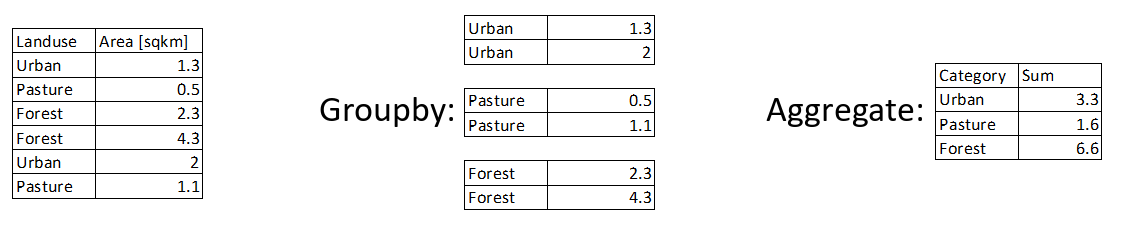

In [224]:
#Create a new Dataframe
mydata = {
    'Landuse': ['Urban', 'Pasture', 'Forest', 'Forest', 'Urban', 'Pasture'],
    'Area': [1.3, 0.5, 2.3, 4.3, 2, 1.1]
}

df = pd.DataFrame(mydata)
df

,Landuse,Area
0,Urban,1.3
1,Pasture,0.5
2,Forest,2.3
3,Forest,4.3
4,Urban,2.0
5,Pasture,1.1


In [231]:
df.groupby('Landuse').sum() #could also be .mean() etc.


,Area
Landuse,
Forest,6.6
Pasture,1.6
Urban,3.3


In [206]:
df.groupby('Landuse').describe()

Area                                              
        count  mean       std  min    25%   50%    75%  max
Landuse                                                    
Forest    2.0  3.30  1.414214  2.3  2.800  3.30  3.800  4.3
Pasture   2.0  0.80  0.424264  0.5  0.650  0.80  0.950  1.1
Urban     2.0  1.65  0.494975  1.3  1.475  1.65  1.825  2.0

***
***
### 📖Apply functions to DataFrames <a class="anchor" id="chapter4"></a>

In [207]:
mydata = {
    'City': ['Bochum', 'Essen', 'Dortmund', 'Duesseldorf', 'Oberhausen'],
    'Population': [364628, 583109, 587010, 619294, 210829],
    'Area_sqm': [145400000, 210300000, 280700000, 217400000, 77040000]
}
df_pop = pd.DataFrame(mydata)
df_pop

,City,Population,Area_sqm
0,Bochum,364628,145400000
1,Essen,583109,210300000
2,Dortmund,587010,280700000
3,Duesseldorf,619294,217400000
4,Oberhausen,210829,77040000


In [208]:
def sqm_to_sqkm (value):
    return value/1000000

In [209]:
df_pop['Area_sqkm'] = df_pop['Area_sqm'].apply(sqm_to_sqkm)

df_pop

,City,Population,Area_sqm,Area_sqkm
0,Bochum,364628,145400000,145.40
1,Essen,583109,210300000,210.30
2,Dortmund,587010,280700000,280.70
3,Duesseldorf,619294,217400000,217.40
4,Oberhausen,210829,77040000,77.04


***
***
### 📖Sort Data <a class="anchor" id="chapter5"></a>

In [210]:
df_pop.sort_values('Population', ascending=True)

,City,Population,Area_sqm,Area_sqkm
4,Oberhausen,210829,77040000,77.04
0,Bochum,364628,145400000,145.40
1,Essen,583109,210300000,210.30
2,Dortmund,587010,280700000,280.70
3,Duesseldorf,619294,217400000,217.40


***
***
### 📖Import / Export data <a class="anchor" id="chapter6"></a>
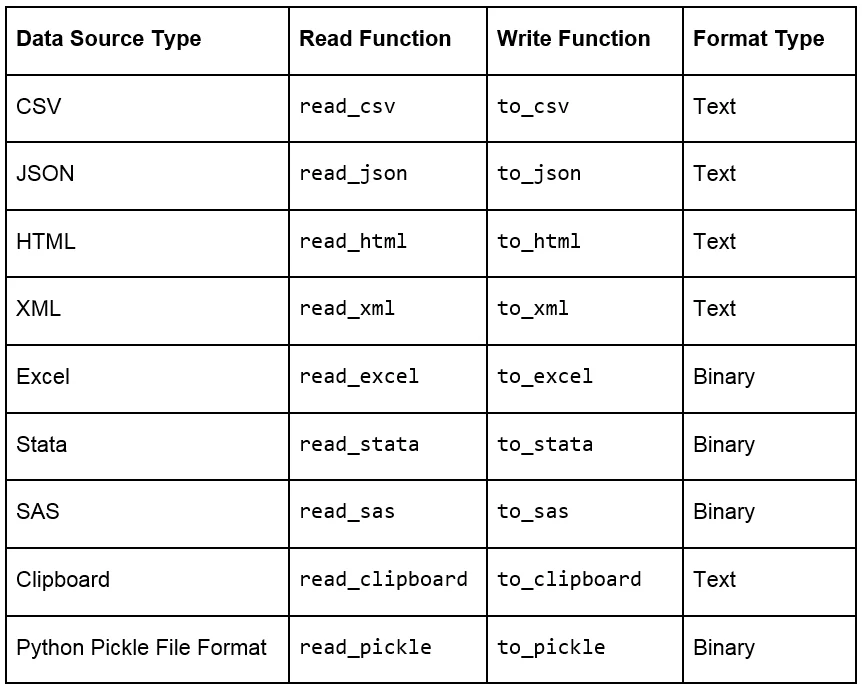
[Source](https://subscription.packtpub.com/book/big-data-and-business-intelligence/9781789959413/1/ch01lvl1sec04/pandas)

[More Reader & Writer](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

To open files, we need to know their location on our hard disc. We can provide the path to the file either as an absolute or relative path. An absolute path starts with the name of the hard disc itself and continues with the folder chain until the file is reached (e.g. D:/myseminars/KI/Session_2/Data/MyCSV.csv). A relative path provides information about the location of a file based on the location of the Python files working directory. In our case this is equal to the location of the Python file we are coding in. We can specify a relative path with './', which stands for the folder we are working in. We can also move one folder up with '../'.

1. Example for an absolute path to our CSV file: "D:/MyAI_Folder/AI_Seminar/01_Python_Basics/02_Python_Pandas/Data/Airmeasurements.csv"
2. Example for a relative path: "./Data/Airmeasurements.csv"


In [211]:
pd.read_csv('./Data/Airmeasurements.csv')

,MEASURE POINT;JEAR;MONTH;TIME_FROM;TIME_TO;MEASURED VALUE
0,1;2008;January;20080103;20080201;37
1,1;2008;February;20080201;20080229;55
2,1;2008;March;20080229;20080401;44
3,1;2008;April;20080401;20080430;53
4,1;2008;May;20080430;20080530;55
...,...
4401,1031;2022;February;20220129;20220302;18
4402,1031;2022;March;20220302;20220331;24
4403,1031;2022;April;20220331;20220502;20
4404,1031;2022;May;20220502;20220601;16


As you can see, pandas loaded the csv. However, it was not loaded correctly. We need to specify a seperator.

In [240]:
df = pd.read_csv('./Data/Airmeasurements.csv', sep= ';')
df

,MEASURE POINT,JEAR,MONTH,TIME_FROM,TIME_TO,MEASURED VALUE
0,1,2008,January,20080103,20080201,37
1,1,2008,February,20080201,20080229,55
2,1,2008,March,20080229,20080401,44
3,1,2008,April,20080401,20080430,53
4,1,2008,May,20080430,20080530,55
...,...,...,...,...,...,...
4401,1031,2022,February,20220129,20220302,18
4402,1031,2022,March,20220302,20220331,24
4403,1031,2022,April,20220331,20220502,20
4404,1031,2022,May,20220502,20220601,16


Lets filter the data for the measuring point 1 and save it to a new file

In [241]:
new_df = df[df['MEASURE POINT'] == 7]
new_df

,MEASURE POINT,JEAR,MONTH,TIME_FROM,TIME_TO,MEASURED VALUE
756,7,2008,January,20080103,20080201,43
757,7,2008,February,20080201,20080229,58
758,7,2008,March,20080229,20080401,46
759,7,2008,April,20080401,20080430,58
760,7,2008,May,20080430,20080530,58
...,...,...,...,...,...,...
925,7,2022,February,20220129,20220302,29
926,7,2022,March,20220302,20220331,36
927,7,2022,April,20220331,20220502,28
928,7,2022,May,20220502,20220601,26


In [214]:
new_df.to_csv('./Data/Airmeasurements_Station7.csv', sep = ';', index=False) #You can set index=True if you need the index

### 🧠 This section contains tasks that can be solved with the knowledge from the current notebook.<a class="anchor" id="chapter7"></a>

### ✏️1. Use the DataFrame from the previous task to calculate a new column with the population density for each city

### ✏️2. Load the CSV file  "Airmeasuringstation-data_EPSG25832_CSV.csv"

### ✏️3. Replace -9999 by NaN
If you open the CSV in Excel, you will notice that there are some measurements with -9999. This NoData value will effect statistical calculations and should be replaced by 'NaN'. Check Google how to solve this issue, or use [this link](https://stackoverflow.com/questions/29247712/how-to-replace-a-value-in-pandas-with-nan) if you do not find any answers.
Hint1: It is easier to replace the NoData value for the whole DataFrame
Hint2: Store it in a new variable

### ✏️4. Calculate the mean, stdv, min, max and quantiles of the NO2 values for each measuring point

### ✏️5. Filter for measuring station 22

### ✏️6. Calculate the number of days with a NO2 value above 50 for station 22
Print the result with a f-string

### ✏️7. Save the DataFrame from task six to a new file

### 💡This section contains solutions for given tasks that could be solved with the knowledge from the current notebook.<a class="anchor" id="chapter8"></a>

### 💡1. Use the DataFrame from the previous task to calculate a new column with the population density for each city

In [ ]:
df_pop['Density'] = df_pop["Population"] / df_pop["Area_sqkm"]
df_pop

,City,Population,Area_sqkm,Density
0,Bochum,364628,145.40,2507.757909
1,Essen,583109,210.30,2772.748455
2,Dortmund,587010,280.70,2091.236195
3,Duesseldorf,619294,217.40,2848.638454
4,Oberhausen,210829,77.04,2736.617342


### 💡2. Load the CSV file  "Airmeasuringstation-data_EPSG25832_CSV.csv"

In [ ]:
df = pd.read_csv("./Data/Airmeasuringstation-data_EPSG25832_CSV.csv", sep=';')
df

,MEASURE POINT,JEAR,MONTH,TIME_FROM,TIME_TO,MEASURED VALUE
0,1,2008,January,20080103,20080201,37
1,1,2008,February,20080201,20080229,55
2,1,2008,March,20080229,20080401,44
3,1,2008,April,20080401,20080430,53
4,1,2008,May,20080430,20080530,55
...,...,...,...,...,...,...
4401,1031,2022,February,20220129,20220302,18
4402,1031,2022,March,20220302,20220331,24
4403,1031,2022,April,20220331,20220502,20
4404,1031,2022,May,20220502,20220601,16


### 💡3. Replace -9999 by NaN
If you open the CSV in Excel, you will notice that there are some measurements with -9999. This NoData value will effect statistical calculations and should be replaced by 'NaN'. Check Google how to solve this issue, or use [this link](https://stackoverflow.com/questions/29247712/how-to-replace-a-value-in-pandas-with-nan) if you do not find any answers.
Hint1: It is easier to replace the NoData value for the whole DataFrame
Hint2: Store it in a new variable

In [ ]:
cleaned_df = df.replace(-9999, np.NaN)
cleaned_df

,MEASURE POINT,JEAR,MONTH,TIME_FROM,TIME_TO,MEASURED VALUE
0,1,2008,January,20080103,20080201,37.0
1,1,2008,February,20080201,20080229,55.0
2,1,2008,March,20080229,20080401,44.0
3,1,2008,April,20080401,20080430,53.0
4,1,2008,May,20080430,20080530,55.0
...,...,...,...,...,...,...
4401,1031,2022,February,20220129,20220302,18.0
4402,1031,2022,March,20220302,20220331,24.0
4403,1031,2022,April,20220331,20220502,20.0
4404,1031,2022,May,20220502,20220601,16.0


### 💡. Calculate the mean, stdv, min, max and quantiles of the NO2 values for each measuring point

In [ ]:
cleaned_df[['MEASURED VALUE', 'MEASURE POINT']].groupby('MEASURE POINT').describe()

MEASURED VALUE                                                  \
                       count       mean        std   min    25%   50%    75%   
MEASURE POINT                                                                  
1                      174.0  36.356322   9.235489  17.0  29.00  36.5  43.00   
2                      173.0  57.491329  12.456258  31.0  49.00  59.0  66.00   
3                       60.0  42.933333   6.196956  26.0  39.00  43.0  47.25   
4                      173.0  46.508671   9.579301  27.0  40.00  48.0  53.00   
5                      173.0  46.017341  10.475594  24.0  39.00  46.0  54.00   
7                      174.0  40.040230   9.440020  21.0  33.00  40.0  46.75   
8                      174.0  35.954023   7.435904  21.0  30.00  36.0  40.75   
9                      174.0  46.793103  10.190257  27.0  40.00  46.0  53.00   
13                     173.0  45.092486   8.369560  26.0  39.00  45.0  51.00   
14                     174.0  37.448276   7.457407  22.0  32.00  37.0  43.00   
16                     173.0  51.335260   9.323188  31.0  46.00  53.0  57.00   
17                     173.0  50.115607   9.516109  28.0  44.00  51.0  56.00   
19                      60.0  43.166667   6.067883  28.0  39.50  43.0  47.00   
20                     174.0  39.160920   7.773340  24.0  33.00  39.5  45.00   
21                     174.0  43.270115   8.757591  25.0  36.25  44.0  49.00   
22                     173.0  38.381503   7.658716  24.0  33.00  38.0  43.00   
24                     172.0  35.918605   9.058246  12.0  30.00  36.0  42.00   
26                      12.0  34.333333   6.124961  28.0  28.75  33.5  37.00   
27                     174.0  27.137931   5.912996  15.0  23.00  27.0  31.00   
28                     173.0  44.196532   8.749524  26.0  37.00  45.0  50.00   
29                      12.0  45.666667   5.944185  35.0  43.50  45.0  47.75   
30                      60.0  43.033333  10.293929  22.0  35.75  44.5  51.00   
31                      12.0  35.166667   3.270622  31.0  32.75  34.5  38.00   
32                      12.0  27.333333   4.355422  22.0  23.75  26.5  32.00   
33                     174.0  41.517241   8.575219  21.0  36.00  41.0  47.00   
34                     173.0  46.023121   9.671917  25.0  41.00  46.0  53.00   
38                     173.0  41.225434   7.672894  24.0  36.00  41.0  46.00   
39                      36.0  33.111111   4.785560  24.0  29.00  33.5  37.00   
40                      36.0  36.555556   5.448168  28.0  32.25  37.0  40.00   
41                      12.0  29.333333   3.576014  25.0  26.00  28.5  31.75   
42                      12.0  31.083333   2.745520  28.0  28.75  31.0  32.50   
43                     102.0  37.166667   8.035914  22.0  30.00  38.5  44.00   
44                      24.0  30.416667   4.392847  23.0  27.00  29.0  33.25   
45                      77.0  38.701299   6.826930  26.0  33.00  38.0  44.00   
46                      78.0  29.589744   5.950960  18.0  26.00  29.0  33.00   
47                      78.0  29.653846   5.872735  18.0  26.00  29.0  33.00   
48                      40.0  33.500000   4.893743  26.0  29.00  33.0  37.25   
49                      40.0  27.800000   4.427189  20.0  24.00  27.5  32.00   
50                      40.0  29.525000   4.551627  21.0  26.00  30.0  32.50   
51                      39.0  25.205128   4.549028  17.0  22.00  26.0  28.00   
52                      37.0  26.540541   4.986619  17.0  23.00  26.0  30.00   
53                      27.0  35.777778   3.400603  31.0  33.00  36.0  38.00   
54                       6.0  18.500000   3.082207  15.0  16.25  18.0  20.50   
55                       6.0  20.000000   3.633180  16.0  17.50  19.5  21.50   
1031                     6.0  20.166667   3.250641  16.0  18.25  19.5  23.00   

                     
                max  
MEASURE POINT        
1              60.0  
2              83.0  
3              54.0  
4              67.0  
5              77.0

### 💡5. Filter for measuring station 22

In [ ]:
point22 = cleaned_df[cleaned_df['MEASURE POINT'] == 22]
point22

,MEASURE POINT,JEAR,MONTH,TIME_FROM,TIME_TO,MEASURED VALUE
2382,22,2008,January,20080103,20080201,34.0
2383,22,2008,February,20080201,20080229,55.0
2384,22,2008,March,20080229,20080401,44.0
2385,22,2008,April,20080401,20080430,57.0
2386,22,2008,May,20080430,20080530,58.0
...,...,...,...,...,...,...
2551,22,2022,February,20220129,20220302,27.0
2552,22,2022,March,20220302,20220331,36.0
2553,22,2022,April,20220331,20220502,30.0
2554,22,2022,May,20220502,20220601,29.0


### 💡6. Calculate the number of days with a NO2 value above 50 for station 22
Print the result with a f-string

In [ ]:
above_50 = sum(point22['MEASURED VALUE']>50)
print(f"There were {above_50} days with an NO2 value above 50")

There were 14 days with an NO2 value above 50


### 💡7. Save the DataFrame from task six to a new file

In [ ]:
cleaned_df.to_csv('./Data/Test.csv', sep=';')